Links:
- https://en.wikipedia.org/wiki/Logistic_map
- https://www.youtube.com/watch?v=ovJcsL7vyrk

# Logistic map or how chaos can arise from a very simple nonlinear equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# for styling
plt.rcParams.update({
    "text.usetex": True,
})
plt.style.use('ggplot')

$$ x_{n+1} = r x_n (1 - x_n)$$

This equation models population of animals (e.g. rabits) in a controlled environment

In [3]:
# Logistic function
def logistic_eq(r: float, x: float) -> float:
    """ r is the growth rate
    x is between 0 and 1
    """
    return r * x * (1 - x)

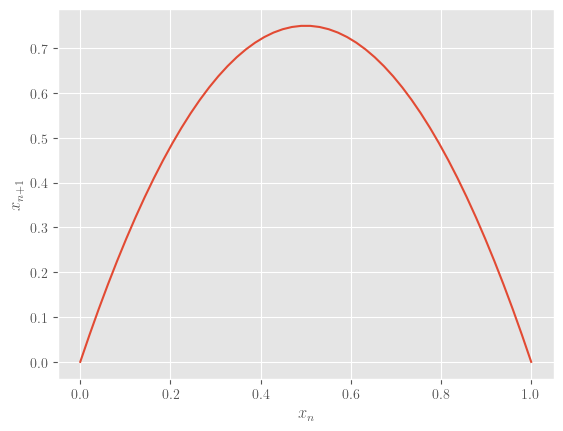

In [4]:
# Plot the logistic function
x = np.linspace(0, 1)

plt.plot(x, logistic_eq(3, x))

plt.xlabel(r'$x_n$')
plt.ylabel(r'$x_{n+1}$')

plt.show()

In [5]:
#np.linspace?

In [6]:
x

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [7]:
logistic_eq(1, x)

array([0.        , 0.01999167, 0.03915035, 0.05747605, 0.07496876,
       0.09162849, 0.10745523, 0.12244898, 0.13660975, 0.14993753,
       0.16243232, 0.17409413, 0.18492295, 0.19491878, 0.20408163,
       0.2124115 , 0.21990837, 0.22657226, 0.23240317, 0.23740108,
       0.24156601, 0.24489796, 0.24739692, 0.24906289, 0.24989588,
       0.24989588, 0.24906289, 0.24739692, 0.24489796, 0.24156601,
       0.23740108, 0.23240317, 0.22657226, 0.21990837, 0.2124115 ,
       0.20408163, 0.19491878, 0.18492295, 0.17409413, 0.16243232,
       0.14993753, 0.13660975, 0.12244898, 0.10745523, 0.09162849,
       0.07496876, 0.05747605, 0.03915035, 0.01999167, 0.        ])

In [5]:
# Iterate the function for a given r
# Think of one timepoins as one year
def iterate_logistic_eq(x_initial: float, r: float, simulation_time: int) -> None:
    x_n = []
    x = x_initial;
    timepoints = range(simulation_time)
    
    # Iterate the logistic equation
    for time in timepoints:
        x_n.append(x)
        x = logistic_eq(r, x)
        
    # create the plot
    plt.figure(figsize=(15, 7))
    plt.plot(timepoints, x_n, marker='o',markersize=2.5)
    #plt.ylim(0, 1)
    #plt.xlim(0, T[-1])
    plt.title('Logistic map with initial value {0}, growth rate of {1}, plotting for {2} timepoints'.format(x_initial, r, simulation_time))
    plt.xlabel('Time t')
    plt.ylabel('X_t')
    
    plt.show()

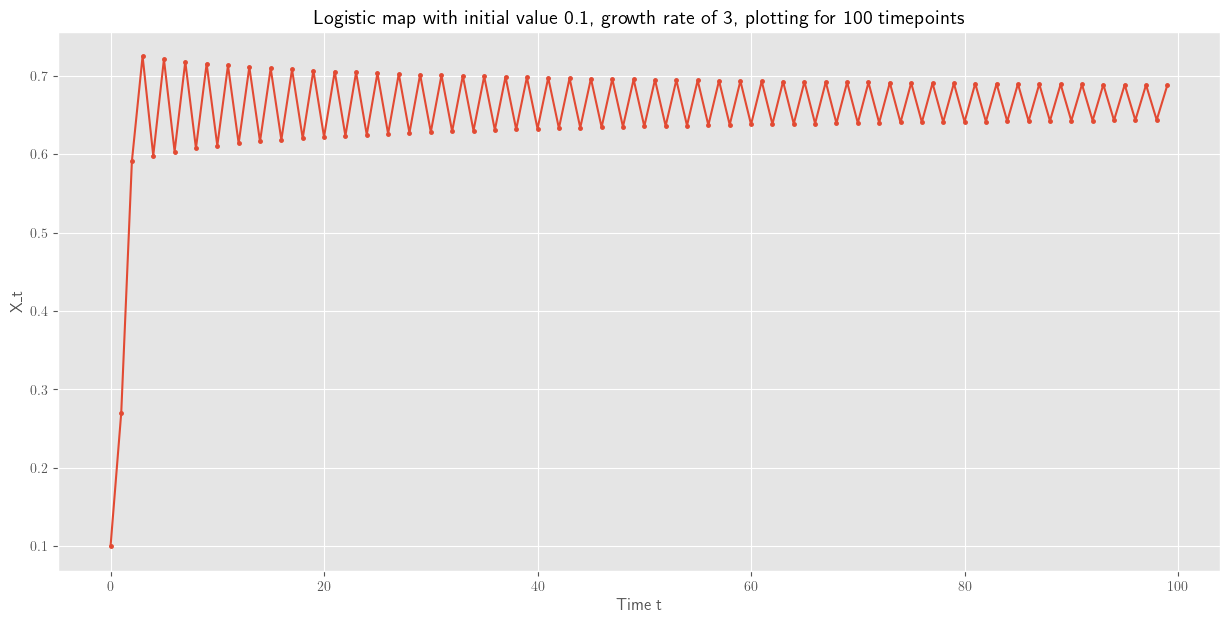

In [7]:
iterate_logistic_eq(0.1, 3, 100)

Equilibrium population! (Fixed point)

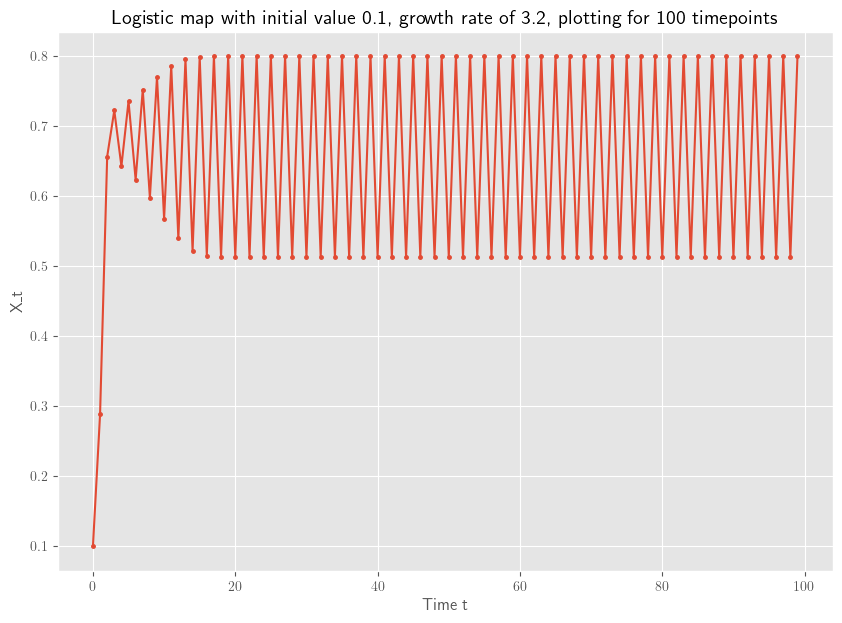

In [10]:
iterate_logistic_eq(0.1, 3.2, 100)

Cycle of two points!

## Let's add a widget!

In [8]:
from ipywidgets import interact, fixed

In [9]:
# https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html
interact(iterate_logistic_eq, x_initial=(0, 1, 0.1), r=fixed(2.1), simulation_time=fixed(100))

interactive(children=(FloatSlider(value=0.0, description='x_initial', max=1.0), Output()), _dom_classes=('widg…

<function __main__.iterate_logistic_eq(x_initial: float, r: float, simulation_time: int) -> None>

In [10]:
# https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html
interact(iterate_logistic_eq, x_initial=fixed(0.2), r=(0, 10, 0.1), simulation_time=fixed(100))

interactive(children=(FloatSlider(value=5.0, description='r', max=10.0), Output()), _dom_classes=('widget-inte…

<function __main__.iterate_logistic_eq(x_initial: float, r: float, simulation_time: int) -> None>

In [ ]:
HollowoodHollowood

## Bifurcation diagram

In [18]:
# Create the bifurcation diagram
# Equilibrium vs r
def bifurcation_diagram(x_initial, n_skip, n_iter, r_max = 4):
    # List of r values, the x axis of the bifurcation plot
    R = []
    # List of equilibrium values, the y axis of the bifurcation plot
    X = []
    
    # Create the r values to loop. For each r value we will plot n_iter points
    r_step = 10000
    r_range = np.linspace(0, r_max, r_step)

    for r in r_range:
        x = x_initial;
        
        # For each r, iterate the logistic function and collect datapoint if n_skip iterations have occurred
        for i in range(n_iter + n_skip):
            if i >= n_skip:
                R.append(r)
                X.append(x)
                
            x = logistic_eq(r, x);
            
    # Plot the data    
    plt.figure(figsize=(15, 8))
    #plt.plot(R, X, ls='', marker=',')
    plt.plot(R, X, linestyle='', marker=',')
    
    plt.ylim(0, 1.1)
    #plt.xlim(0, r_max)
    plt.xlim(2.9, 4)
    
    plt.xlabel('r')
    plt.ylabel('X')
    plt.title('Logistic map with initial value {0}, skip plotting first {1} iterations, then plot next {2} iterations'.format(x_initial, n_skip, n_iter))
    
    plt.show()
    
    #return R, X

In [19]:
interact(bifurcation_diagram, x_initial=fixed(0.2), n_skip=fixed(100), n_iter=fixed(100),r_max=(2.9, 4, 0.01))

interactive(children=(FloatSlider(value=4.0, description='r_max', max=4.0, min=2.9, step=0.01), Output()), _do…

<function __main__.bifurcation_diagram(x_initial, n_skip, n_iter, r_max=4)>

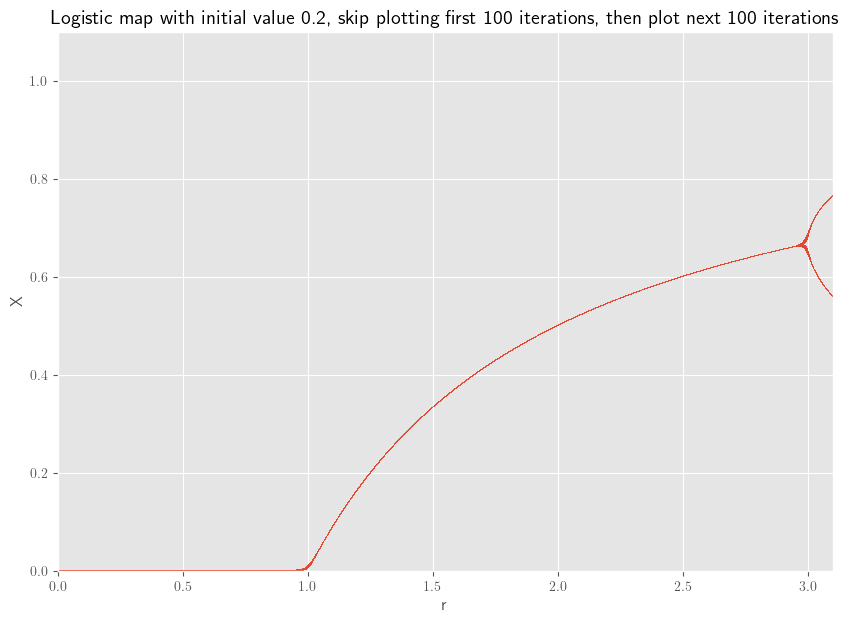

In [15]:
r, x = bifurcation_diagram(x_initial=0.2, n_skip=100, n_iter=100,r_max=3.1)

In [18]:
import pandas as pd
pd.DataFrame(list(zip(r, x)),columns =['Name', 'val'])

,Name,val
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
999995,3.1,0.558014
999996,3.1,0.764567
999997,3.1,0.558014
999998,3.1,0.764567


In [50]:
# what would happen if n_skip = 0?

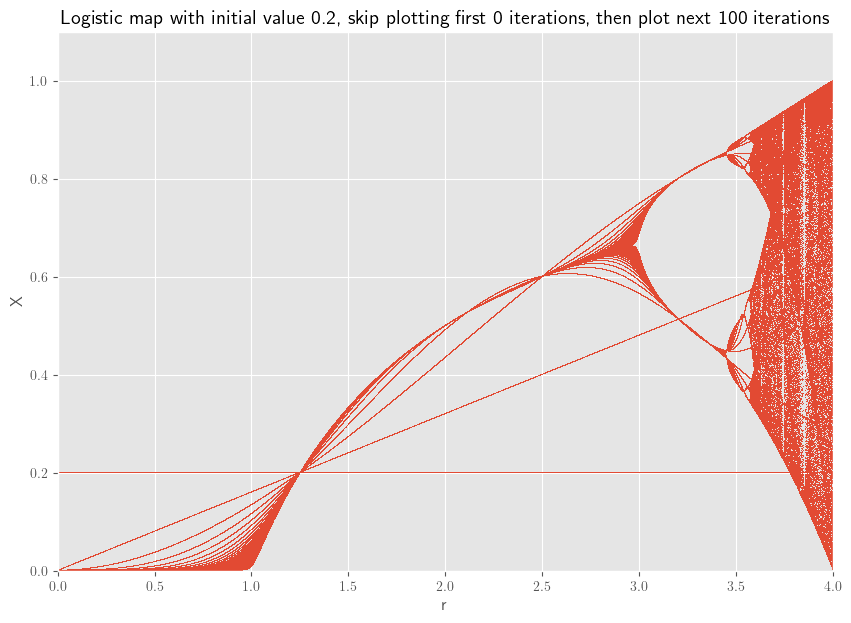

In [51]:
bifurcation_diagram(0.2, 0, 100, 4)

In [127]:
#len(r)

20000

In [162]:
len(x)

100000

In [165]:
x[0:20]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

HW: try with

$$ x_{n+1} = r sin(x_n) $$

TODO: show them 
- Feigenbaum plot
- Mandelbrot fractal